# Mask_Image_Object_Detection
##### 마스크 착용 여부

In [6]:
# PyTorch 버전 확인
import torch
print(torch.__version__)

1.7.1+cu101


In [7]:
# PyTorch 버전 확인
import torchvision
print(torchvision.__version__)

0.8.2+cu101


## 로컬 pc의 터미널에서 다운로드 후 압축하여 jupyterlab에 올려서 압축 풀기
##### git clone https://github.com/ultralytics/yolov5.git

In [ ]:
!unzip yolov5.zip

### Yolov5 학습에 필요한 모듈 설치

In [ ]:
!pip install -r /home/work/yolov5/requirements.txt

# Mask Dataset 다운로드

(보통 LabelImg를 써서 데이터 라벨링하기때문에 txt파일과 이미지파일을 분리해준다.)

*예제는 이미 데이터 라벨링되어있는 샘플 자료를 가져왔음

In [3]:
%mkdir /home/work/yolov5_mask
%cd /home/work/yolov5_mask/

/home/work/yolov5_mask


In [4]:
!curl -L "https://app.roboflow.com/ds/UDw102Apji?key=9OZpzHulse" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   1373      0 --:--:-- --:--:-- --:--:--  1375
100 12.5M  100 12.5M    0     0  11.2M      0  0:00:01  0:00:01 --:--:-- 29.9M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: train/
   creating: train/images/
 extracting: train/images/-----------1-_jpeg_jpg.rf.296d9c41220d8a49d473657bb1baed0a.jpg  
 extracting: train/images/-----------2-_jpeg_jpg.rf.08e4dd0dd07140ec85ad9e99c7f3d623.jpg  
 extracting: train/images/-----------2-_jpeg_jpg.rf.7a7f83b3476345b9c53a363590f5e5c2.jpg  
 extracting: train/images/-----------2021-06-17-------10-45-40_png_jpg.rf.569d0162d627ec844560c0cd9837aff2.jpg  
 extracting: train/images/-----------2021-06-17-------10-45-40_png_jpg.rf.e6acaa9cb1864a1c62a1b74917e7e218.jpg  
 extracting: train/images/-----------20

In [5]:
%cd /home/work

/home/work


### Data.yaml 설정 셋팅

In [6]:
# # Data.yaml 설정 확인
%cat /home/work/yolov5_mask/data.yaml

train: ../train/images
val: ../valid/images

nc: 2
names: ['0', '1']

### Data.yaml 파일 설정값 변경

In [7]:
#기존 설정값 -> 변경하여 dump

import yaml

with open('/home/work/yolov5_mask/data.yaml', 'r') as f:
  data = yaml.load(f)

print(data)
data['names'] = ['mask','no-mask']

data['train'] = '/home/work/yolov5_mask/train/'
data['val'] = '/home/work/yolov5_mask/valid/'

with open('/home/work/yolov5_mask/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 2, 'names': ['0', '1']}
{'train': '/home/work/yolov5_mask/train/', 'val': '/home/work/yolov5_mask/valid/', 'nc': 2, 'names': ['mask', 'no-mask']}


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


# Yolo V5 학습하기
### 인자값
###### --img: input image 사이즈
###### --batch: 배치 사이즈
###### --epochs: epochs 수
###### --data:  위에서 생성한 Data.yaml 파일
###### --cfg: model yaml file
###### --weights: 전이학습 사용시 사용할 weight(가중치)[model에 맞게 yolov5s.pt/yolov5m.pt/yolov5l.pt/yolov5x.pt]
###### --device: GPU/CPU
###### --name: 학습 정보를 runs 폴더 안에 저장할 때 이름을 지정 ex) yolov5/runs/exp0_name/
###### --resume: 학습 중 멈췄다면 python train.py --resume 코드를 통해 가장 최근에 저장된 weight "last.py"부터 학습을 다시 시작할 수 있다 (멈췄던 epoch 구간부터 다시 시작됨). 특정 weight 부터 학습을 다시 시작하고 싶다면 python train.py --resume runs/exp0/weights/last.pt 이런식으로 weight 경로를 적어주면 된다.

In [5]:
# Cuda 사용을 위한 버전 확인
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [1]:
img_size = 416
bacth_size = 32
# epochs = 100
epochs = 2
weights_size = 'm' # s,m,l,x
name = 'yolov5'
name_fix = name+weights_size
data_path = '/home/work/yolov5_mask/data.yaml'
yalm_path = '/home/work/yolov5/models/{}.yaml'
weights_path = './yolov5/{}.pt'
name = 'mask_{}_results'

In [2]:
# yolo v5로 학습

!python3 /home/work/yolov5/train.py --img {img_size} --batch {bacth_size} --epochs {epochs} --data {data_path} \
--cfg {yalm_path.format(name_fix)} --weights {weights_path.format(name_fix)} --name {name.format(name_fix)} # --device gpu

train: weights=./yolov5/yolov5m.pt, cfg=/home/work/yolov5/models/yolov5m.yaml, data=/home/work/yolov5_mask/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=2, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=mask_yolov5m_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2022-6-3 Python-3.7.6 torch-1.7.1+cu101 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, c

# 모델 성능평가 요약
##### mAP가 높을수록 정확/낮을수록 부정확  *mAP@.5가 50% IoU 임계값
##### Precision(정밀도) - 모델이 예측한 결과의 Positive 결과가 얼마나 정확한지 나타내는 값 
##### Recall(재현율) - 모델의 예측한 결과가 얼마나 Positive 값을 잘 찾는지 측정 값

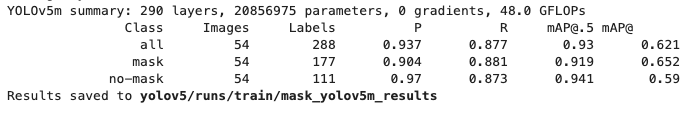

In [4]:
# valid image 갯수 확인 
from glob import glob

img_list = glob('/home/work/yolov5_mask/valid/images/*.jpg')

print(len(img_list))

54


# 결과 확인

detect: weights=['/home/work/yolov5/runs/train/mask_yolov5m_results/weights/best.pt'], source=/home/work/yolov5_mask/valid/images/S1-EV360_FACEMA_M_20200130144349_jpg.rf.3f0736a586889e3b1ef89733176d8d31.jpg, data=yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-6-3 Python-3.7.6 torch-1.7.1+cu101 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients, 48.0 GFLOPs
image 1/1 /home/work/yolov5_mask/valid/images/S1-EV360_FACEMA_M_20200130144349_jpg.rf.3f0736a586889e3b1ef89733176d8d31.jpg: 416x416 14 masks, Done. (0.019s)
Speed: 0.2ms pre-process, 19.1ms inference, 1.1ms NMS per image at sha

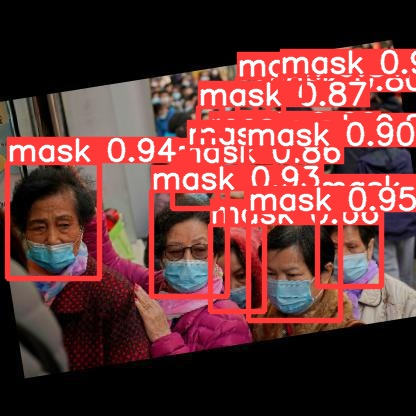

In [5]:
from IPython.display import Image
import os

val_img_path = img_list[41]

weights_path = f"/home/work/yolov5/runs/train/mask_{name_fix}_results/weights/best.pt"

!python3 /home/work/yolov5/detect.py --weights "{weights_path}" --img 416 --conf 0.5 --source "{val_img_path}"

detect_img_path = '/home/work/yolov5/runs/detect/exp'

Image(os.path.join(detect_img_path, os.path.basename(val_img_path)))

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path, force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/notebook/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-6-16 Python-3.7.6 torch-1.7.1+cu101 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20856975 parameters, 0 gradients, 48.0 GFLOPs
Adding AutoShape... 


In [10]:
# 추론
val_img_path = ['/home/work/yolov5_mask/valid/images/S1-EV360_FACEMA_M_20200130144349_jpg.rf.3f0736a586889e3b1ef89733176d8d31.jpg']
results = model(val_img_path)

# 결과
# results.print()
# results.show()
# results.save() # Save image to 'runs\detect\exp'

# results.xyxy[0]  # 예측 (tensor)
results.pandas().xyxy[0]  # 예측 (pandas)

,xmin,ymin,xmax,ymax,confidence,class,name
0,251.168655,211.182831,339.761749,319.472717,0.952096,0,mask
1,150.458893,192.716675,227.933578,295.664154,0.949836,0,mask
2,5.279965,162.897827,101.295006,280.031250,0.919417,0,mask
3,319.808289,201.472473,381.612793,285.022125,0.917641,0,mask
4,256.480713,91.647514,282.136871,123.347298,0.896438,0,mask
5,280.594879,75.992752,302.237305,99.921806,0.895936,0,mask
6,188.859787,145.374222,221.556915,188.520309,0.891423,0,mask
7,211.133316,133.643219,240.434494,170.666138,0.891180,0,mask
8,248.209839,150.410492,289.612091,205.584549,0.888155,0,mask
9,197.724167,107.159782,221.089615,135.184998,0.882383,0,mask
